# Generating Diagrams with FlyBrainLab

In this short tutorial, we show an example of automatic diagram generation for a small circuit using FlyBrainLab. The code shown in this tutorial is intended to be a starting point for diagram design.

**Important:** Before starting to run the code below, **(i)** create an FBL workspace for Hemibrain, **(ii)** change the kernel for this notebook to the kernel you just created.


Let us start by querying the neurons for which we will be constructing the diagram:

In [4]:
%matplotlib inline
my_client = fbl.get_client()
data = my_client.executeNLPquery('show $ExR1$')

[FFBOLab Client NLP 2020-09-08 00:54:49] NLP successfully parsed query.
[FFBOLab Client NLP 2020-09-08 00:54:50] Received a message.
[FFBOLab Client NLP 2020-09-08 00:54:50] Received a command.
[FFBOLab Client NLP 2020-09-08 00:54:52] Received data.
[FFBOLab Client NLP 2020-09-08 00:54:54] Received a message.
[FFBOLab Client NLP 2020-09-08 00:54:54] Received data.
[]


We can now try to get information on the neuron we retrieve:

In [5]:
my_client.autoLayout() # Run the default layouting algorithm
# And then load the generated file:
with open('G_auto.svg', 'r') as file:
    data = file.read()

[FFBOLab Client NLP 2020-09-08 00:54:58] Received a message.
[FFBOLab Client NLP 2020-09-08 00:54:58] Received data.


At this stage you can get some warnings. Do not worry about them; you will create your own function based on autoLayout to improve the visuals of the default diagram. You can modify autoLayout function in the fbl.Client class to generate different looking of diagrams.

The code below updates widget managers in the frontend, loads the diagram we just generated, and adds interactivity to it:

In [6]:
# Update widgets and widget managers throughout the frontend (included for compatibility)
for i in fbl.widget_manager.widgets:
    if fbl.widget_manager.widgets[i].widget_id not in fbl.client_manager.clients[fbl.widget_manager.widgets[i].client_id]['widgets']:
        fbl.client_manager.clients[fbl.widget_manager.widgets[i].client_id]['widgets'].append(fbl.widget_manager.widgets[i].widget_id)

# Load the diagram
my_client.tryComms({'widget':'GFX', 
                    'messageType': 'loadCircuitFromString', 
                    'data': {'string':data, 'name':'custom'}})

# Run the submodule called onGraphVizLoad2 to make the diagram interactive
my_client.tryComms({'widget':'GFX', 
                    'messageType': 'eval', 
                    'data': {'data':"window.fbl.loadSubmodule('data/FBLSubmodules/onGraphVizLoad2.js');", 'name':'custom'}})

Your final environment should look like the following:

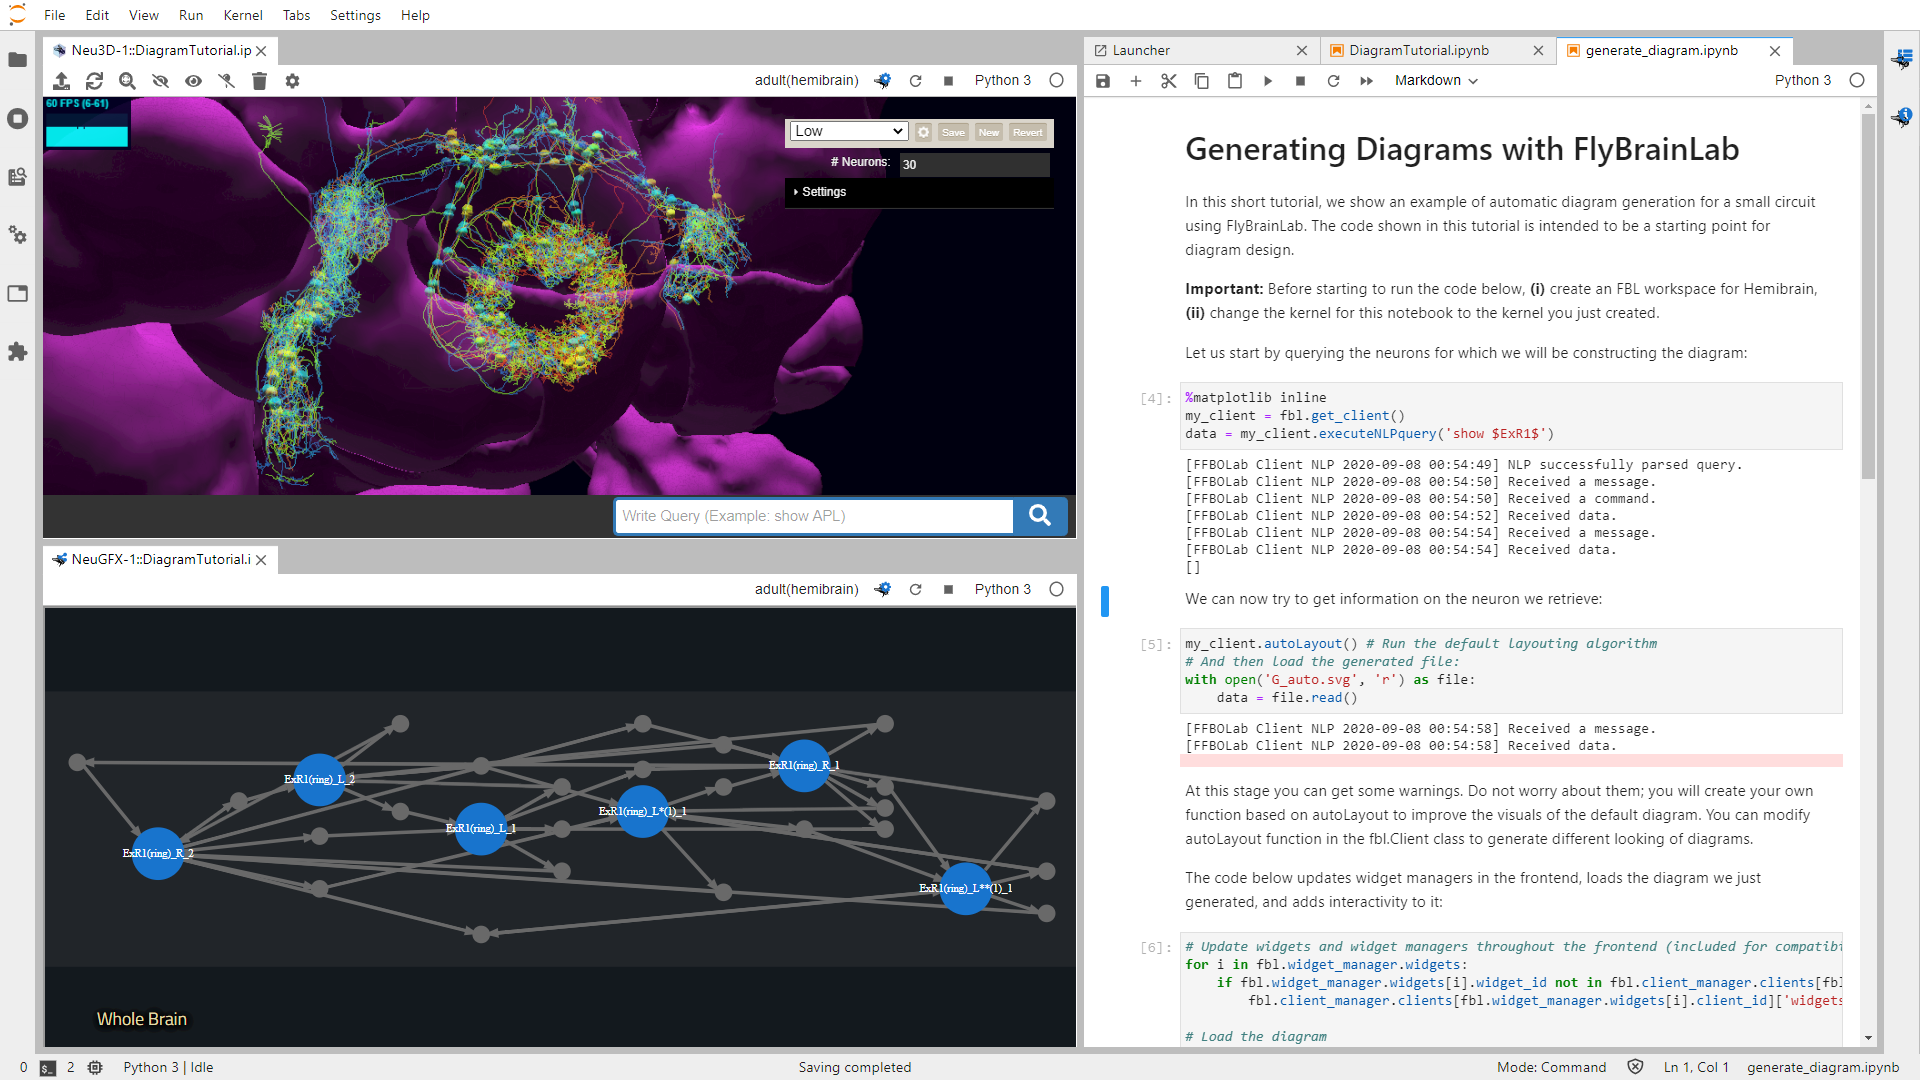

In [7]:
import requests
from IPython.display import Image 
url = "https://github.com/FlyBrainLab/Tutorials/raw/master/tutorials/diagram_generation_tutorial/images/diagram_tutorial.png"
Image(requests.get(url).content)

Voila! You should see a rather basic-looking circuit diagram. This is a starting point for developing your own FBL scripts that automatically load a diagram.

## Appendix:

Here, we give some pointers to get started on diagram interactivity. 

You can start by taking a look at the https://github.com/FlyBrainLab/NeuGFX package for looking at how circuit diagrams are handled; specifically, check https://github.com/FlyBrainLab/NeuGFX/tree/master/data/FBLSubmodules to see the kinds of diagram interactivity-giving scripts currently available to choose from. You can write and load custom scripts by writing Javascript files instead of using the default scripts by using the 'eval' messageType presented above. For example, you can send the entire content of a .js script.